#Colab Preparation

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [ ]:

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1nWgnHY7sVoptRBg2HRIoYnwGmZhikrbE'}) # replace the id with id of file you want to access
downloaded.GetContentFile('df.tsv') 

Jupyter Notebook

Import Libs

### 1. Loading and cleaning data

In [ ]:
# Import libraries
from collections import defaultdict,Counter
import importlib,math
from importlib import reload  
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as scipy
from scipy import stats
from scipy.sparse import csr_matrix
from scipy.spatial import distance
from scipy.sparse.linalg import norm
from sklearn import cluster,metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import paired_distances,cosine_similarity,cosine_distances,paired_euclidean_distances
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors.kde import KernelDensity
import regex as re

from sklearn.feature_selection import VarianceThreshold
pd.options.display.max_columns=201
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)   # To see all the columns of data frame

In [ ]:
df = pd.read_csv("df.tsv", sep='\t', header = None)

In [ ]:
df.head(2)

0  \
0  008482cf51383c158b54e593cfa5fbf7.pdf   
1  009fab39d746267b6de8428366fe4b02.pdf   

                                                   1  \
0  address__post_town address__postcode address__...   
1  address__post_town address__postcode address__...   

                                                   2  \
0  TAR\n1\nAugust 2016\nTrustees' Annual Report f...   
1  \fAnnual Report 2015-2017 July, 2017\nStepping...   

                                                   3  \
0  CHARITY Trustees’' Annual Report for the perio...   
1  \n; Na {if anv)\n{\noA el\nC 3 QIC [1€d C\nf (...   

                                                   4  \
0  CHARITY\nTrustees' Annual Report for the perio...   
1  Charity Name\nNo lif anv)\nStepping Stone Thea...   

                                                   5  
0  TAR\n1\nAugust 2016\nTrustees' Annual Report f...  
1  \n; Na {if anv)\n{\noA el\nC 3 QIC [1€d C\nf (...

In [ ]:
df.rename(columns={0:'filename', 1:'keys', 2:'text_djvu', 3:'text_tesseract', 4:'text_textract', 5:'text_best'}, inplace=True)

In [ ]:
df.head(3)

filename  \
0  008482cf51383c158b54e593cfa5fbf7.pdf   
1  009fab39d746267b6de8428366fe4b02.pdf   
2  01c7fd563327947c68abdd9717ef228d.pdf   

                                                keys  \
0  address__post_town address__postcode address__...   
1  address__post_town address__postcode address__...   
2  address__post_town address__postcode address__...   

                                           text_djvu  \
0  TAR\n1\nAugust 2016\nTrustees' Annual Report f...   
1  \fAnnual Report 2015-2017 July, 2017\nStepping...   
2  Promoting Independent Living\nCelebrating new\...   

                                      text_tesseract  \
0  CHARITY Trustees’' Annual Report for the perio...   
1  \n; Na {if anv)\n{\noA el\nC 3 QIC [1€d C\nf (...   
2  54 S ke *\nB\n \nWelcome to our Annual\nReport...   

                                       text_textract  \
0  CHARITY\nTrustees' Annual Report for the perio...   
1  Charity Name\nNo lif anv)\nStepping Stone Thea...   
2  Promoting Independent Living\nAbility\nAbility...   

                                           text_best  
0  TAR\n1\nAugust 2016\nTrustees' Annual Report f...  
1  \n; Na {if anv)\n{\noA el\nC 3 QIC [1€d C\nf (...  
2  54 S ke *\nB\n \nWelcome to our Annual\nReport...

In [ ]:
df['text_djvu'][0]

"TAR\\n1\\nAugust 2016\\nTrustees' Annual Report for the period\\nFrom\\nPeriod start date\\nTo\\nPeriod end date\\n30\\n04\\n2015\\n29\\n04\\n2016\\nSection A\\nReference and administration details\\nCharity name\\nPC Nicola Hughes Memorial Fund\\nOther names charity is known by\\nRegistered charity number (if any) 1156398\\nCharity's principal address Unit 1, Block B, Gatehead business Park\\nDelph New Road\\nOldham\\nPostcode\\nOL3 5DE\\nNames of the charity trustees who manage the charity\\nTrustee name\\nOffice (if any)\\nDates acted if not for whole\\nyear\\nName of person (or body) entitled\\nto appoint trustee (if any)\\n1 Bryndon Hughes Chair\\n2\\n3\\n4\\n5\\n6\\n7\\n8\\n9\\n10\\n11\\n12\\n13\\n14\\n15\\n16\\n17\\nNames of the trustees for the charity, if any, (for example, any custodian trustees)\\nName\\nDates acted if not for whole year\\nRichard Bartlett\\nMark Brook\\nTAR\\n2\\nAugust 2016\\nNames and addresses of advisers (Optional information)\\nType of adviser\\nName\

In [ ]:
df['text_tesseract'][0]

"CHARITY Trustees’' Annual Report for the period\\n(OMMIsSIoN Period start date Period end date\\ng From To\\nSection A Reference and administration details\\n \\n \\nCharity name‘ PC Nicola Hughes Memorial Fund\\nOther names charity is known by\\nRegistered charity number (if any)|1156398\\nCharity's principal address |Unit 1, Block B, Gatehead business Park\\nDelph New Road\\nOldham\\nPostcode ‘0L3 5DE\\n \\n \\n \\n \\n \\n \\n \\n \\n \\nNames of the charity trustees who manage the charity Dates acted if not for whole Name of person (or body) entitled  \\n \\n \\nName Dates acted if not for whole year\\nRichard Bartlett\\nMark Brook\\n \\nTAR 1 August 2016\\nNames and addresses of advisers (Optional information)\\n \\nType of adviser Name Address\\nLegal Advisor John Ainley North Ainley Halliwell Solicitors, Clegg St, Oldham, OL1 1PS\\nAccountant David Richardson Richardson Accountancy\\n \\n \\n \\n \\n \\nName of chief executive or names of senior staff members (Optional informat

In [ ]:
df['text_textract'][0]

"CHARITY\\nTrustees' Annual Report for the period\\nCOMMISSION\\nPeriod start date\\nPeriod end date\\n30\\n04\\n2015\\n29\\n04\\n2016\\nFrom\\nTo\\nSection A\\nReference and administration details\\nCharity name\\nPC Nicola Hughes Memorial und\\nOther names charity is known by\\nRegistered charity number (if any)\\n1156398\\nCharity's principal address\\nUnit 1, Block B, Gatehead business Park\\nDelph New Road\\nOldham\\nPostcode\\nOL3 5DE\\nNames of the charity trustees who manage the charity\\nTrustee name\\nOffice (if any)\\nDates acted if not for whole\\nName of person (or body) entitled\\nyear\\nto appoint trustee (if any)\\n1\\nBryndon Hughes\\nChair\\n2\\n3\\n4\\n5\\n6\\n7\\n8\\n9\\n10\\n11\\n12\\n13\\n14\\n15\\n16\\n17\\nNames of the trustees for the charity, if any, (for example, any custodian trustees)\\nName\\nDates acted if not for whole year\\nRichard Bartlett\\nMark Brook\\nTAR\\n1\\nAugust 2016\\nNames and addresses of advisers (Optional information)\\nType of adviser\\

In [ ]:
df['text_best'][0]

"TAR\\n1\\nAugust 2016\\nTrustees' Annual Report for the period\\nFrom\\nPeriod start date\\nTo\\nPeriod end date\\n30\\n04\\n2015\\n29\\n04\\n2016\\nSection A\\nReference and administration details\\nCharity name\\nPC Nicola Hughes Memorial Fund\\nOther names charity is known by\\nRegistered charity number (if any) 1156398\\nCharity's principal address Unit 1, Block B, Gatehead business Park\\nDelph New Road\\nOldham\\nPostcode\\nOL3 5DE\\nNames of the charity trustees who manage the charity\\nTrustee name\\nOffice (if any)\\nDates acted if not for whole\\nyear\\nName of person (or body) entitled\\nto appoint trustee (if any)\\n1 Bryndon Hughes Chair\\n2\\n3\\n4\\n5\\n6\\n7\\n8\\n9\\n10\\n11\\n12\\n13\\n14\\n15\\n16\\n17\\nNames of the trustees for the charity, if any, (for example, any custodian trustees)\\nName\\nDates acted if not for whole year\\nRichard Bartlett\\nMark Brook\\nTAR\\n2\\nAugust 2016\\nNames and addresses of advisers (Optional information)\\nType of adviser\\nName\

In [ ]:
df['keys'].unique()

array(['address__post_town address__postcode address__street_line charity_name charity_number income_annually_in_british_pounds report_date spending_annually_in_british_pounds'],
      dtype=object)

In [ ]:
df['text_djvu'].unique()

array(["TAR\\n1\\nAugust 2016\\nTrustees' Annual Report for the period\\nFrom\\nPeriod start date\\nTo\\nPeriod end date\\n30\\n04\\n2015\\n29\\n04\\n2016\\nSection A\\nReference and administration details\\nCharity name\\nPC Nicola Hughes Memorial Fund\\nOther names charity is known by\\nRegistered charity number (if any) 1156398\\nCharity's principal address Unit 1, Block B, Gatehead business Park\\nDelph New Road\\nOldham\\nPostcode\\nOL3 5DE\\nNames of the charity trustees who manage the charity\\nTrustee name\\nOffice (if any)\\nDates acted if not for whole\\nyear\\nName of person (or body) entitled\\nto appoint trustee (if any)\\n1 Bryndon Hughes Chair\\n2\\n3\\n4\\n5\\n6\\n7\\n8\\n9\\n10\\n11\\n12\\n13\\n14\\n15\\n16\\n17\\nNames of the trustees for the charity, if any, (for example, any custodian trustees)\\nName\\nDates acted if not for whole year\\nRichard Bartlett\\nMark Brook\\nTAR\\n2\\nAugust 2016\\nNames and addresses of advisers (Optional information)\\nType of adviser\

In [ ]:
df['text_tesseract'].unique()

array(["CHARITY Trustees’' Annual Report for the period\\n(OMMIsSIoN Period start date Period end date\\ng From To\\nSection A Reference and administration details\\n \\n \\nCharity name‘ PC Nicola Hughes Memorial Fund\\nOther names charity is known by\\nRegistered charity number (if any)|1156398\\nCharity's principal address |Unit 1, Block B, Gatehead business Park\\nDelph New Road\\nOldham\\nPostcode ‘0L3 5DE\\n \\n \\n \\n \\n \\n \\n \\n \\n \\nNames of the charity trustees who manage the charity Dates acted if not for whole Name of person (or body) entitled  \\n \\n \\nName Dates acted if not for whole year\\nRichard Bartlett\\nMark Brook\\n \\nTAR 1 August 2016\\nNames and addresses of advisers (Optional information)\\n \\nType of adviser Name Address\\nLegal Advisor John Ainley North Ainley Halliwell Solicitors, Clegg St, Oldham, OL1 1PS\\nAccountant David Richardson Richardson Accountancy\\n \\n \\n \\n \\n \\nName of chief executive or names of senior staff members (Optional i

In [ ]:
df['text_textract'].unique()

array(["CHARITY\\nTrustees' Annual Report for the period\\nCOMMISSION\\nPeriod start date\\nPeriod end date\\n30\\n04\\n2015\\n29\\n04\\n2016\\nFrom\\nTo\\nSection A\\nReference and administration details\\nCharity name\\nPC Nicola Hughes Memorial und\\nOther names charity is known by\\nRegistered charity number (if any)\\n1156398\\nCharity's principal address\\nUnit 1, Block B, Gatehead business Park\\nDelph New Road\\nOldham\\nPostcode\\nOL3 5DE\\nNames of the charity trustees who manage the charity\\nTrustee name\\nOffice (if any)\\nDates acted if not for whole\\nName of person (or body) entitled\\nyear\\nto appoint trustee (if any)\\n1\\nBryndon Hughes\\nChair\\n2\\n3\\n4\\n5\\n6\\n7\\n8\\n9\\n10\\n11\\n12\\n13\\n14\\n15\\n16\\n17\\nNames of the trustees for the charity, if any, (for example, any custodian trustees)\\nName\\nDates acted if not for whole year\\nRichard Bartlett\\nMark Brook\\nTAR\\n1\\nAugust 2016\\nNames and addresses of advisers (Optional information)\\nType of ad

In [ ]:
df['text_best'].unique()

array(["TAR\\n1\\nAugust 2016\\nTrustees' Annual Report for the period\\nFrom\\nPeriod start date\\nTo\\nPeriod end date\\n30\\n04\\n2015\\n29\\n04\\n2016\\nSection A\\nReference and administration details\\nCharity name\\nPC Nicola Hughes Memorial Fund\\nOther names charity is known by\\nRegistered charity number (if any) 1156398\\nCharity's principal address Unit 1, Block B, Gatehead business Park\\nDelph New Road\\nOldham\\nPostcode\\nOL3 5DE\\nNames of the charity trustees who manage the charity\\nTrustee name\\nOffice (if any)\\nDates acted if not for whole\\nyear\\nName of person (or body) entitled\\nto appoint trustee (if any)\\n1 Bryndon Hughes Chair\\n2\\n3\\n4\\n5\\n6\\n7\\n8\\n9\\n10\\n11\\n12\\n13\\n14\\n15\\n16\\n17\\nNames of the trustees for the charity, if any, (for example, any custodian trustees)\\nName\\nDates acted if not for whole year\\nRichard Bartlett\\nMark Brook\\nTAR\\n2\\nAugust 2016\\nNames and addresses of advisers (Optional information)\\nType of adviser\

In [ ]:
df.shape

(1729, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   filename        1729 non-null   object
 1   keys            1729 non-null   object
 2   text_djvu       1684 non-null   object
 3   text_tesseract  1728 non-null   object
 4   text_textract   1728 non-null   object
 5   text_best       1729 non-null   object
dtypes: object(6)
memory usage: 81.2+ KB


In [ ]:
# checking possible values each variable can take and for stalk-root we notice that '?' is also a possible value.
for c in df.columns:    
    if (df[c].dtype==object):
        print("=============", c,df[c].unique())

============= filename ['008482cf51383c158b54e593cfa5fbf7.pdf'
 '009fab39d746267b6de8428366fe4b02.pdf'
 '01c7fd563327947c68abdd9717ef228d.pdf' ...
 'ffb1325d77fde527581429bb28322205.pdf'
 'ffbf63bf6483012f2fd0af6c77ab3da6.pdf'
 'ffcc30999650db76144fe4ff91b60e0e.pdf']
============= keys ['address__post_town address__postcode address__street_line charity_name charity_number income_annually_in_british_pounds report_date spending_annually_in_british_pounds']
============= text_djvu ["TAR\\n1\\nAugust 2016\\nTrustees' Annual Report for the period\\nFrom\\nPeriod start date\\nTo\\nPeriod end date\\n30\\n04\\n2015\\n29\\n04\\n2016\\nSection A\\nReference and administration details\\nCharity name\\nPC Nicola Hughes Memorial Fund\\nOther names charity is known by\\nRegistered charity number (if any) 1156398\\nCharity's principal address Unit 1, Block B, Gatehead business Park\\nDelph New Road\\nOldham\\nPostcode\\nOL3 5DE\\nNames of the charity trustees who manage the charity\\nTrustee name\\nO

In [ ]:
import nltk
from keras.preprocessing.text import Tokenizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
tokenizer=RegexpTokenizer(r'\w+|\.')
stop_words = stopwords.words('english')
stop_words.extend(['ltd', 'rd', 'box', 'please', 'nearest', 'london', 'september','ltd', 'rd', 'five', 'ie', 'ii', 'november', 'mr', 'Mr', 'sg', 'uk', 'april', 'trustntrustees', 'islington', 'birmingham', 'thetford', '.', 'china', 'cambridge', ' eliot', 'aja', 'choose', 'name', 'eg', 'march', 'june', 'july', 'ended', 'use', 'co', 'nn','na', 'st', 'nnn', 'kingdom', 'united', 'december', 'united kingdom','august','may','nat','pcc','ni','ne','th','tn','nthe','nsection','wherenrelevant','nh','nyou','ncambridge', 'englandncombined','npgl','ttn','celp','ngreat','nblackwell','rya'])


In [ ]:
test1 = df['text_textract'][2]
test1 = re.sub(r"\\n|\r", " ", test1)
test1

'Promoting Independent Living Ability Ability Ability ABILITY Hello Highlights Welcome to our Annual Celebrating new Report for 2016. Hillingdon services For the first time, we have Award win for the O-Team combined our reports to Carron Cleversley was delighted to accept two awards customers and stakeholders. for Ability at the Customer Scrutiny Inspection (CSI) We have also changed our Awards in Manchester on 27 October. publication date, So that we can provide more Carron is a member of the Q-Team - our customer-led up-to-date financial information. quality auditing team - which won \'Excellence in Colin (centre front) celebrates the official opening at The Lodge, tenant inspection and mystery shopping at the with other customers from our Farnham services. event Ours was the only entry to make the shortlist, Having joined Ability on 1 July 2016, I spent my because the judges were so impressed. first 3 months getting to know the organisation, Re-opening The Lodge in Farnham The judge

In [ ]:
test2 = df['text_best'][2]
test2 = re.sub(r"\\n|\r", " ", test2)
test2

'54 S ke * B   Welcome to our Annual Report for 2016. For the first time, we have combined our reports to customers and stakeholders. We have also changed our publication date, so that we can provide more up-to-date financial information.   Having joined Ability on 1July 2016, | spent my first 3 months getting to know the organisation, visiting services and speaking to customers and colleagues. Above all, | was struck by the positivity and shared values across our services. At the official opening of Cavell House in Farnham, in September, | found the four new flats as good as any | have seen — spacious, accessible and adapted to support independent living. The tenants were as impressed with their new homes as | was and went on to describe how the support staff listen and act on their wishes, enable independent living and respect individual choices. My ambition for Ability in the coming months and years is to build on our strong foundations. We will focus on the quality of our services 

In [ ]:
# Cleaning Function

def clean_text(text):
    text = re.sub(r'\\n|\r', ' ', text)
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub(r'[^\w\s]', '', text) # removing all punctuations 
    text = re.sub(r'\s\S(?!\S)|(?<!\S)\S\s', " ", text)

  
    text = re.sub(r'/(?<!\S).(?!\S)\s*/', ' ', text) # removing single character spaces
    text = re.sub(r' \b.([A-Za-z])\1.\b', ' ', text) # removing double character
   
    text = re.sub(r'\s\s+', ' ', text) # removing multiple spaces

    text = text.strip().lower()
    text = ''.join([i for i in text if not i.isdigit()])
    filters='!"\'#$%&()*+,-/:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    return text

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
df['text_textract'] = df['text_textract'].apply(lambda x : clean_text(str(x)))

In [ ]:
df['text_textract'] = df['text_textract'].apply(lambda x : tokenizer.tokenize(str(x)))
df['text_textract'] = df['text_textract'].apply(lambda x : [w for w in x if not w in stop_words])

In [ ]:
df['text_textract']

0       [charity, trustees, annual, report, period, co...
1       [charity, lif, anv, stepping, stone, theatre, ...
2       [promoting, independent, living, ability, abil...
3       [annua, report, accounts, year, bic, media, ac...
4       [greenway, centre, registered, charity, number...
                              ...                        
1724    [charity, trustees, annual, report, period, co...
1725    [gordon, russell, trust, charity, trustees, re...
1726    [friends, ezra, charity, charity, commission, ...
1727    [caspari, foundation, company, number, registe...
1728    [registered, company, number, england, wales, ...
Name: text_textract, Length: 1729, dtype: object

In [ ]:
df['text_best'] = df['text_best'].apply(lambda x : clean_text(str(x)))
df['text_best'] = df['text_best'].apply(lambda x : tokenizer.tokenize(str(x)))
df['text_best'] = df['text_best'].apply(lambda x : [w for w in x if not w in stop_words])

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]


In [ ]:
df['lemmatize1']= df['text_textract'].apply(lemmatize_text) # 1 for textract
df['lemmatize2']= df['text_best'].apply(lemmatize_text)  # 2 for best

In [ ]:
from nltk.stem.porter import PorterStemmer 
stemmer = PorterStemmer() 
df['stemmer1'] = df['lemmatize1'].apply(lambda x: [stemmer.stem(i) for i in x]) # 1 for textract 
df['stemmer2'] = df['lemmatize2'].apply(lambda x: [stemmer.stem(i) for i in x]) # 2 for best
df.head(1)

filename  \
0  008482cf51383c158b54e593cfa5fbf7.pdf   

                                                keys  \
0  address__post_town address__postcode address__...   

                                           text_djvu  \
0  TAR\n1\nAugust 2016\nTrustees' Annual Report f...   

                                      text_tesseract  \
0  CHARITY Trustees’' Annual Report for the perio...   

                                       text_textract  \
0  [charity, trustees, annual, report, period, co...   

                                           text_best  \
0  [tar, trustees, annual, report, period, period...   

                                          lemmatize1  \
0  [charity, trustee, annual, report, period, com...   

                                          lemmatize2  \
0  [tar, trustee, annual, report, period, period,...   

                                            stemmer1  \
0  [chariti, truste, annual, report, period, comm...   

                                            stemmer2  
0  [tar, truste, annual, report, period, period, ...

In [ ]:
# Merge the tokens back
df['stemmer1'] = df['stemmer1'].apply(lambda x: ' '.join([w for w in x]))
df['stemmer2'] = df['stemmer2'].apply(lambda x: ' '.join([w for w in x]))
df.head(1)


filename  \
0  008482cf51383c158b54e593cfa5fbf7.pdf   

                                                keys  \
0  address__post_town address__postcode address__...   

                                           text_djvu  \
0  TAR\n1\nAugust 2016\nTrustees' Annual Report f...   

                                      text_tesseract  \
0  CHARITY Trustees’' Annual Report for the perio...   

                                       text_textract  \
0  [charity, trustees, annual, report, period, co...   

                                           text_best  \
0  [tar, trustees, annual, report, period, period...   

                                          lemmatize1  \
0  [charity, trustee, annual, report, period, com...   

                                          lemmatize2  \
0  [tar, trustee, annual, report, period, period,...   

                                            stemmer1  \
0  chariti truste annual report period commiss pe...   

                                            stemmer2  
0  tar truste annual report period period start d...

In [ ]:
df['stemmer1'][0]

'chariti truste annual report period commiss period start date period end date section refer administr detail chariti pc nicola hugh memori und name chariti known regist chariti number chariti princip address unit block gatehead busi park delph new road oldham postcod ol de name chariti truste manag chariti truste offic date act whole person bodi entitl year appoint truste bryndon hugh chair name truste chariti exampl custodian truste date act whole year richard bartlett mark brook tar name address advis option inform type advis address legal advisor ohn ainley north ainley halliwel solicitor clegg oldham ol p account david richardson richardson account chief execut name senior staff member option inform bryndon hugh section structur govern manag descript chariti trust type govern document constitut trust constitut chariti constitut charit incorpor organis trust associ compani truste select method nomin elect vote advisori bodi appoint elect addit govern issu optiona inform includ poli

In [ ]:
df['stemmer2'][0]

'tar truste annual report period period start date period end date section refer administr detail chariti pc nicola hugh memori fund name chariti known regist chariti number chariti princip address unit block gatehead busi park delph new road oldham postcod ol de name chariti truste manag chariti truste offic date act whole year person bodi entitl appoint truste bryndon hugh chair name truste chariti exampl custodian truste date act whole year richard bartlett mark brook tar name address advis option inform type advis address legal advisor john ainley north ainley halliwel solicitor clegg oldham ol p account david richardson richardson account chief execut name senior staff member option inform bryndon hugh section structur govern manag descript chariti trust type govern document trust constitut constitut chariti constitut trust associ compani charit incorpor organis truste select method appoint elect nomin elect vote advisori bodi addit govern issu option inform includ addit inform re

### Word cloud for Stemmer

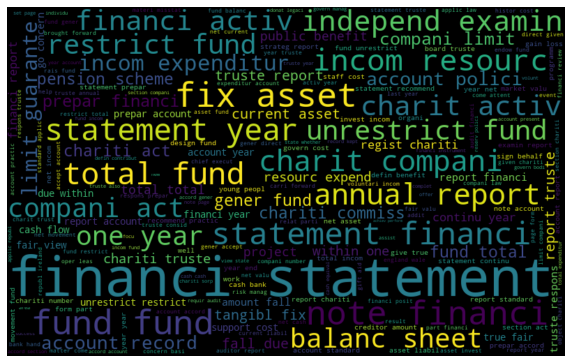

In [ ]:

# Word cloud stemmer
all_words = ' '.join([text for text in df['stemmer1']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500,stopwords= stop_words, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

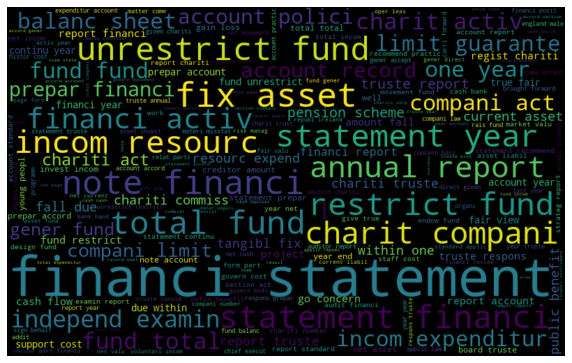

In [ ]:
# Word cloud stemmer
all_words = ' '.join([text for text in df['stemmer2']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500,stopwords= stop_words, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [ ]:
# Merge the tokens back
df['lmt1'] = df['lemmatize1'].apply(lambda x: ' '.join([w for w in x]))
df['lmt2'] = df['lemmatize2'].apply(lambda x: ' '.join([w for w in x]))
df.head(1)

filename  \
0  008482cf51383c158b54e593cfa5fbf7.pdf   

                                                keys  \
0  address__post_town address__postcode address__...   

                                           text_djvu  \
0  TAR\n1\nAugust 2016\nTrustees' Annual Report f...   

                                      text_tesseract  \
0  CHARITY Trustees’' Annual Report for the perio...   

                                       text_textract  \
0  [charity, trustees, annual, report, period, co...   

                                           text_best  \
0  [tar, trustees, annual, report, period, period...   

                                          lemmatize1  \
0  [charity, trustee, annual, report, period, com...   

                                          lemmatize2  \
0  [tar, trustee, annual, report, period, period,...   

                                            stemmer1  \
0  chariti truste annual report period commiss pe...   

                                            stemmer2  \
0  tar truste annual report period period start d...   

                                                lmt1  \
0  charity trustee annual report period commissio...   

                                                lmt2  
0  tar trustee annual report period period start ...

In [ ]:

df['lmt2'][0]

'tar trustee annual report period period start date period end date section reference administration detail charity pc nicola hughes memorial fund name charity known registered charity number charity principal address unit block gatehead business park delph new road oldham postcode ol de name charity trustee manage charity trustee office date acted whole year person body entitled appoint trustee bryndon hughes chair name trustee charity example custodian trustee date acted whole year richard bartlett mark brook tar name address adviser optional information type adviser address legal advisor john ainley north ainley halliwell solicitor clegg oldham ol p accountant david richardson richardson accountancy chief executive name senior staff member optional information bryndon hughes section structure governance management description charity trust type governing document trust constitution constitution charity constituted trust association company charitable incorporated organisation truste

In [ ]:

df['lmt2'][1]

'anv oa el qic receipt payment account period start period end neriod section receipt payment unrestricte restricted endowment total fund last year fund fund fund receipt payment show artiste expense printing advertsing trustee meeting venuehire workshop mentoring teaching cost administration cost sub total asset investment purchase table subtotal total payment let receiptspayments transfer betweenfun cashfunds lastyeare cashfunds thisyearend ccxx account s fccxx account s section statement asset liability end period unrestricte restricted endowmen category detail fund fund fund nearestf cash fund jotal cash fund ok total cash fund receipt payment error error unrestricte restricted endowmen funde fiinde funde detail aare monetary asset fund current cost asset value belongs optional optional detail fund cost current asset value belongs optional onal detail asset retained charity fund amount due due optional liability optional detail relates signed one two trustee behalf signature print 

In [ ]:
df['lmt2'][111]

'judd school development fund registered charity report account year gtons chartered accountant high street battle east sussex judd school development fund report trustee year introduction judd school development fund registered charity number office trustee skinner hall dowgate hill ecr sp constitution fund established trust dated remains governing document trust capital income applied primarily towards financing project capital nature connected judd school tonbridge grant made either school voluntary aided provision education act judd school foundation separate charity support school embrace endowment prize fund trust amended february appoint school managing trustee trustee trustee worshipful company skinner managing trustee trust empowers trustee appoint managing trustee following po sitions headmaster chau governor link governor deputy headmaster current trustee follows master headmaster leaby chair governor robin link governor deputy headmaster page judd school development fund re

### Word cloud for LMT

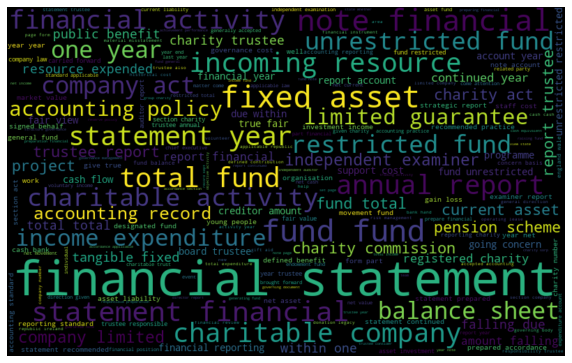

In [ ]:
# Word cloud lmt1
all_words = ' '.join([text for text in df['lmt1']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500,stopwords= stop_words, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

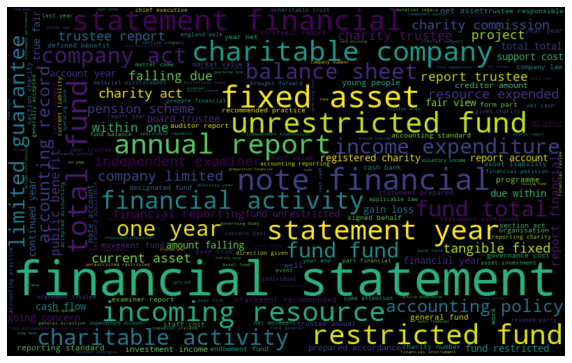

In [ ]:
# Word cloud lmt2
all_words = ' '.join([text for text in df['lmt2']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500,stopwords= stop_words, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

# Vectorize the data

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
tfidf = TfidfVectorizer(
    min_df = 0.1,
    max_df = 0.8,
    max_features = 50000000,
    stop_words = stopwords.words('english')
    # stop_words = stopwords.words('english')   # For checking with and without english SW
)

In [ ]:
tfidf.fit(df['lmt1'].dropna())
text1 = tfidf.transform(df['lmt1'].dropna()) # text1 for textract 

tfidf.fit(df['lmt2'].dropna())
text2 = tfidf.transform(df['lmt2'].dropna()) # text2 for best

In [ ]:
text1  #with english stop words

<1729x1865 sparse matrix of type '<class 'numpy.float64'>'
	with 908779 stored elements in Compressed Sparse Row format>

In [ ]:
text2.shape

(1729, 1844)

# Hyperparameter tuning for optimal number of clusters¶

In [ ]:
max_k=30
data=text2
iters = range(4, max_k+1, 2)

sse = []
for k in iters:
    sse_val = MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_
    sse.append(sse_val)
    print('Fit {} clusters, sse {}'.format(k,sse_val))

Fit 4 clusters, sse 1257.6852188841342
Fit 6 clusters, sse 1182.9495073070311
Fit 8 clusters, sse 1163.1070161490898
Fit 10 clusters, sse 1125.2263795156332
Fit 12 clusters, sse 1101.3252697122912
Fit 14 clusters, sse 1095.5537124626603
Fit 16 clusters, sse 1084.0279477681029
Fit 18 clusters, sse 1058.7610292286768
Fit 20 clusters, sse 1049.3028005599112
Fit 22 clusters, sse 1033.8212807041816
Fit 24 clusters, sse 1037.634685244015
Fit 26 clusters, sse 1016.6561847244253
Fit 28 clusters, sse 1013.1880465377244
Fit 30 clusters, sse 1011.9490556878636


# Plot SSE vs number of clusters

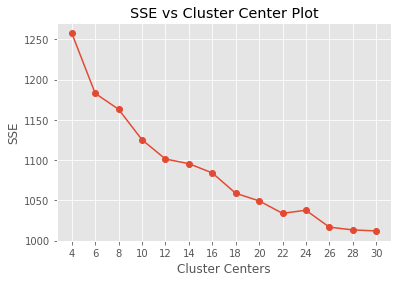

In [ ]:
plt.style.use("ggplot")
f, ax = plt.subplots(1, 1)
ax.plot(iters, sse, marker='o')
ax.set_xlabel('Cluster Centers')
ax.set_xticks(iters)
ax.set_xticklabels(iters)
ax.set_ylabel('SSE')
ax.set_title('SSE vs Cluster Center Plot')
plt.savefig('/content/Clustering-SSE.png')
plt.show()

# Model for optimal number of clusters

In [ ]:
clusters = MiniBatchKMeans(n_clusters=12, init_size=1024, batch_size=2048, random_state=20).fit_predict(text2)

# Print clusters with top terms

In [ ]:
labels=tfidf.get_feature_names()
n_terms=10

new_df = pd.DataFrame(data.todense())
new_df['clusters'] = clusters
# new_df.to_csv('/content/clusters.csv')

In [ ]:
new_df.shape

(1729, 1845)

In [ ]:
text2.shape

(1729, 1844)

In [ ]:
clusters_mean = new_df.groupby(['clusters']).mean()

In [ ]:
clusters_mean.shape

(12, 1844)

In [ ]:
clusters_mean.head(20)

0         1         2         3         4         5     \
clusters                                                               
0         0.009157  0.008470  0.000000  0.018332  0.010418  0.006977   
1         0.004948  0.009510  0.000827  0.001238  0.002539  0.003430   
2         0.002285  0.010954  0.003036  0.001021  0.002783  0.001004   
3         0.009941  0.011248  0.002332  0.036756  0.009866  0.004848   
4         0.008468  0.014733  0.002260  0.002683  0.014582  0.003072   
5         0.003903  0.007502  0.001498  0.000870  0.003004  0.003068   
6         0.001921  0.008486  0.000244  0.000170  0.001608  0.002165   
7         0.003151  0.013103  0.000262  0.003317  0.001663  0.003016   
8         0.012862  0.012341  0.003254  0.003562  0.011499  0.004887   
9         0.005045  0.009868  0.006959  0.005429  0.001055  0.005425   
10        0.003907  0.004807  0.000000  0.000000  0.001776  0.000000   
11        0.008971  0.008454  0.003094  0.065916  0.008671  0.003456   

              6         7         8         9         10        11    \
clusters                                                               
0         0.016116  0.012757  0.006806  0.000000  0.000000  0.000000   
1         0.011773  0.010047  0.003072  0.002868  0.009419  0.002914   
2         0.001048  0.005578  0.001243  0.001187  0.013371  0.003182   
3         0.008755  0.014226  0.001830  0.003717  0.005565  0.003690   
4         0.007313  0.018251  0.005172  0.006659  0.005435  0.002521   
5         0.009331  0.003863  0.000820  0.005170  0.018586  0.002727   
6         0.005047  0.003908  0.001400  0.002732  0.010270  0.003182   
7         0.003248  0.006427  0.001794  0.004407  0.011641  0.001821   
8         0.012218  0.012351  0.003306  0.011471  0.000633  0.002630   
9         0.011497  0.004166  0.001950  0.007949  0.012164  0.001985   
10        0.002522  0.001223  0.001584  0.000299  0.013644  0.002054   
11        0.007556  0.012488  0.001417  0.013678  0.000000  0.007294   

              12        13        14        15        16        17    \
clusters                                                               
0         0.005320  0.002833  0.000000  0.009270  0.012500  0.006628   
1         0.003679  0.011922  0.024645  0.010148  0.015798  0.006308   
2         0.000371  0.003308  0.007893  0.000264  0.000885  0.001277   
3         0.003684  0.003282  0.008191  0.009740  0.009314  0.006409   
4         0.003011  0.007825  0.011111  0.005474  0.009640  0.005738   
5         0.004119  0.016045  0.027455  0.012313  0.020429  0.008395   
6         0.001545  0.007253  0.012883  0.016323  0.006942  0.003625   
7         0.000862  0.004363  0.008180  0.001867  0.004707  0.002420   
8         0.004970  0.000924  0.003747  0.008334  0.010459  0.007682   
9         0.003836  0.014154  0.024336  0.013061  0.013644  0.008775   
10        0.001294  0.011541  0.023558  0.015397  0.013303  0.006061   
11        0.004970  0.000130  0.001863  0.011189  0.004122  0.007946   

              18        19        20        21        22        23    \
clusters                                                               
0         0.000000  0.005410  0.002075  0.000000  0.003516  0.000000   
1         0.006996  0.011131  0.005722  0.004680  0.010389  0.001993   
2         0.003710  0.000272  0.012687  0.003568  0.040177  0.002136   
3         0.002938  0.005018  0.005561  0.011066  0.009956  0.005463   
4         0.003777  0.007052  0.010018  0.006705  0.011121  0.004728   
5         0.007159  0.012016  0.004384  0.002867  0.011632  0.001265   
6         0.005751  0.005225  0.001940  0.003796  0.006733  0.002145   
7         0.006589  0.003300  0.005134  0.006147  0.011369  0.003553   
8         0.006372  0.004642  0.009736  0.010098  0.008071  0.005190   
9         0.006622  0.009644  0.003988  0.006307  0.009613  0.003426   
10        0.005344  0.005399  0.000474  0.001924  0.011541  0.000000   
11        0.006286  0.002184  0.005684  0.007942  0

In [ ]:
for i,r in clusters_mean.iterrows():
    print('\nCluster {}'.format(i))
    print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))


Cluster 0
university,global,international,society,investment,grant,david,human,foundation,right

Cluster 1
reporting,examination,centre,incoming,restricted,examiner,guarantee,director,limited,company

Cluster 2
acted,summary,include,sub,investment,additional,detail,information,name,optional

Cluster 3
trust,teacher,education,pension,investment,scheme,bursary,company,pupil,school

Cluster 4
director,theatre,service,community,people,art,programme,foundation,project,company

Cluster 5
fixed,attention,value,incoming,grant,trust,restricted,examination,investment,examiner

Cluster 6
investment,community,service,examiner,restricted,mission,ministry,christian,parish,church

Cluster 7
hospital,new,examination,payment,receipt,child,community,committee,examiner,group

Cluster 8
home,board,investment,pension,scheme,care,housing,group,service,company

Cluster 9
continued,school,company,incoming,examination,value,examiner,grant,investment,trust

Cluster 10
south,competition,limited,restricted,exami

# Visulaization FCA

In [ ]:
from sklearn.decomposition import FactorAnalysis
FA = FactorAnalysis(n_components = 3).fit_transform(clusters_mean.values)

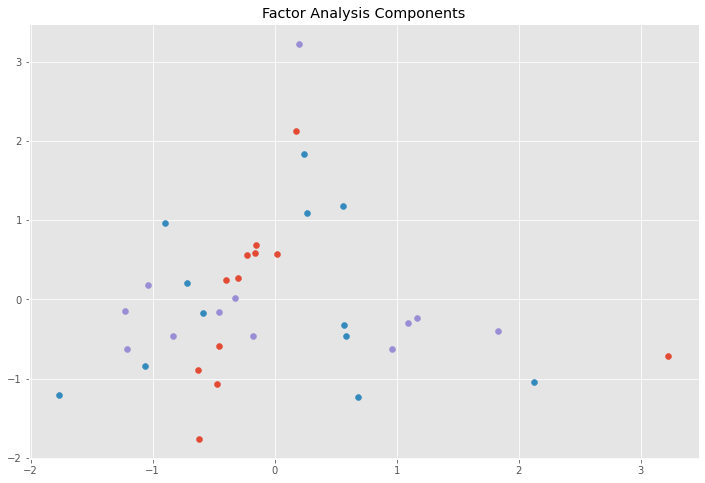

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.title('Factor Analysis Components')
plt.scatter(FA[:,0], FA[:,1])
plt.scatter(FA[:,1], FA[:,2])
plt.scatter(FA[:,2],FA[:,0])

# PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(clusters_mean.values)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

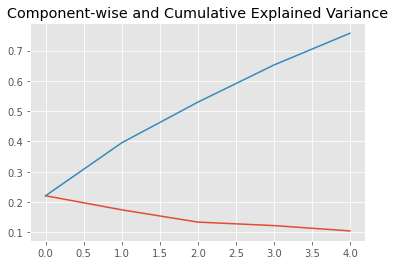

In [ ]:
plt.plot(range(5), pca.explained_variance_ratio_)
plt.plot(range(5), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

In the above graph, the orange line represents component-wise explained variance while the blue line represents the cumulative explained variance. We are able to explain around 65% variance in the dataset using just 3 components. Let us now try to visualize each of these decomposed components:

# Methods Based on Projections

Parameters used:

n_neighbors decides the number of neighbors for each point
n_components decides the number of coordinates for manifold
n_jobs = -1 will use all the CPU cores available

In [ ]:
from sklearn import manifold 
trans_data = manifold.Isomap(n_neighbors=5, n_components=3, n_jobs=-1).fit_transform(clusters_mean.values)

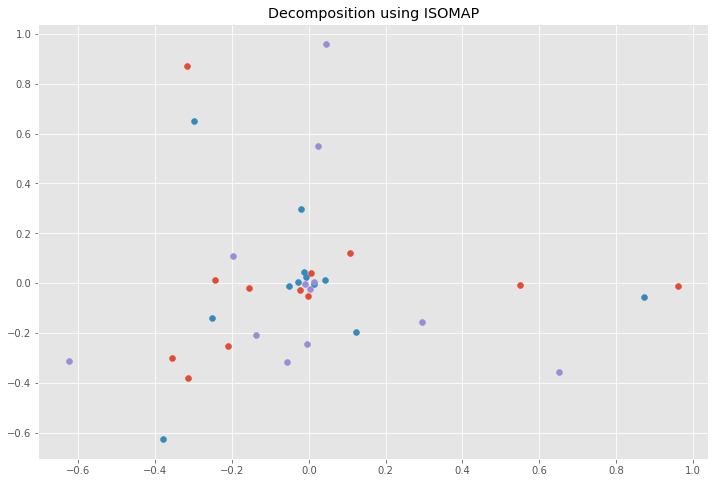

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Decomposition using ISOMAP')
plt.scatter(trans_data[:,0], trans_data[:,1])
plt.scatter(trans_data[:,1], trans_data[:,2])
plt.scatter(trans_data[:,2], trans_data[:,0])

# t- Distributed Stochastic Neighbor Embedding (t-SNE)

In [ ]:
from sklearn.manifold import TSNE 
tsne = TSNE(n_components=3, n_iter=300).fit_transform(clusters_mean.values)

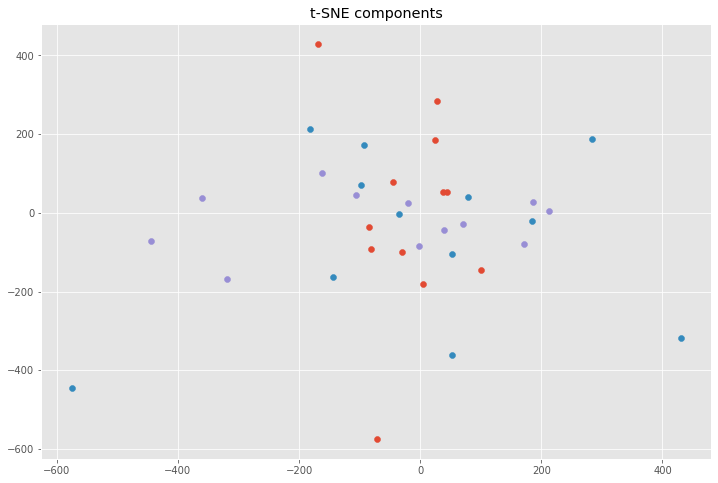

In [ ]:
plt.figure(figsize=(12,8))
plt.title('t-SNE components')
plt.scatter(tsne[:,0], tsne[:,1])
plt.scatter(tsne[:,1], tsne[:,2])
plt.scatter(tsne[:,2], tsne[:,0])

### Trying K-Means and DBScan after TFIDF

In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))

In [ ]:
X1 = vectorizer.fit_transform(df['lmt1'])
X2 = vectorizer.fit_transform(df['lmt2'])

In [ ]:
X1.shape

(1729, 75137)

In [ ]:
X2.shape

(1729, 122688)

In [ ]:
from sklearn.cluster import KMeans

number_of_clusters = 20

model = KMeans(n_clusters=number_of_clusters, 
               init='k-means++', 
               max_iter=100, # Maximum number of iterations of the k-means algorithm for a single run.
               n_init=1)  # Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

model.fit(text1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=20, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [ ]:
for i in range(number_of_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Cluster 0:
 abiliiy
 abnett
 activitiesperiod
 achievin
 adcp
 accolivi
 accountfng
 aclivitics
 actlvthes
 acknowledgement
Cluster 1:
 abo
 acbvities
 accountancytlegaltandtcompliancetfeest
 accommadation
 accom
 activi
 accountstacceptedtbytsttcuthbertstparochialtchurchtcouncilt
 actisely
 absent
 acourt
Cluster 2:
 abo
 acourt
 actves
 aclivitics
 abnoub
 acountlng
 activitks
 aarp
 acilvflies
 aacsb
Cluster 3:
 accommadation
 accom
 activi
 accountstacceptedtbytsttcuthbertstparochialtchurchtcouncilt
 aay
 aap
 actisely
 accordmg
 accouats
 abnoub
Cluster 4:
 accountancybookkeeping
 abnoub
 accardance
 acrosstheboard
 aauabiawg
 acliviliss
 accommadation
 accom
 accunnilated
 abdullah
Cluster 5:
 activitiesperiod
 acquiring
 abdullsh
 abo
 activitiesj
 aclivily
 accdillifil
 actuarral
 acuwues
 acknowledgement
Cluster 6:
 acheivements
 aborty
 abilit
 aceco
 ability
 accommadation
 additio
 achieveis
 aaounts
 accom
Cluster 7:
 abligatlons
 acquiring
 activitiesperiod
 activitiesj
 

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
# X1 = X1.todense() # <-- This line was needed to resolve the issue
# db = DBSCAN(eps=0.2, min_samples=50).fit(text1)
# db

In [ ]:
dbscan_clstr = DBSCAN(eps=0.3, min_samples=4)
dbscan_clstr.fit(X2)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [ ]:
df['dbscan_label'] = dbscan_clstr.labels_

In [ ]:
print(f'{df["dbscan_label"].nunique() - 1} Clusters')
print(f'{df[df["dbscan_label"] == -1].shape[0]} Outliers')

11 Clusters
1682 Outliers


In [ ]:
df.head(2)

filename  \
0  008482cf51383c158b54e593cfa5fbf7.pdf   
1  009fab39d746267b6de8428366fe4b02.pdf   

                                                keys  \
0  address__post_town address__postcode address__...   
1  address__post_town address__postcode address__...   

                                           text_djvu  \
0  TAR\n1\nAugust 2016\nTrustees' Annual Report f...   
1  \fAnnual Report 2015-2017 July, 2017\nStepping...   

                                      text_tesseract  \
0  CHARITY Trustees’' Annual Report for the perio...   
1  \n; Na {if anv)\n{\noA el\nC 3 QIC [1€d C\nf (...   

                                       text_textract  \
0  [charity, trustees, annual, report, period, co...   
1  [charity, lif, anv, stepping, stone, theatre, ...   

                                           text_best  \
0  [tar, trustees, annual, report, period, period...   
1  [anv, oa, el, qic, receipts, payments, account...   

                                          lemmatize1  \
0  [charity, trustee, annual, report, period, com...   
1  [charity, lif, anv, stepping, stone, theatre, ...   

                                          lemmatize2  \
0  [tar, trustee, annual, report, period, period,...   
1  [anv, oa, el, qic, receipt, payment, account, ...   

                                            stemmer1  \
0  chariti truste annual report period commiss pe...   
1  chariti lif anv step stone theatr receipt paym...   

                                            stemmer2  \
0  tar truste annual report period period start d...   
1  anv oa el qic receipt payment account period s...   

                                                lmt1  \
0  charity trustee annual report period commissio...   
1  charity lif anv stepping stone theatre receipt...   

                                                lmt2  dbscan_label  
0  tar trustee annual report period period start ...            -1  
1  anv oa el qic receipt payment account period s...            -1

In [ ]:
df['dbscan_label'].value_counts()

-1     1682
 6        5
 5        5
 4        5
 1        4
 10       4
 9        4
 8        4
 7        4
 3        4
 2        4
 0        4
Name: dbscan_label, dtype: int64

# Another Try

In [ ]:
'''# Build DBSCAN model with Tf-idf vectorizer
tfidfvec = TfidfVectorizer(ngram_range=(1,3), min_df = 0.2, max_df = 0.7, decode_error = "ignore")

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=20000,
                                 min_df=0.15, stop_words=stop_words,
                                 use_idf=True, ngram_range=(1,3))'''

'# Build DBSCAN model with Tf-idf vectorizer\ntfidfvec = TfidfVectorizer(ngram_range=(1,3), min_df = 0.2, max_df = 0.7, decode_error = "ignore")\n\ntfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=20000,\n                                 min_df=0.15, stop_words=stop_words,\n                                 use_idf=True, ngram_range=(1,3))'

In [ ]:
# Build DBSCAN model with Tf-idf vectorizer

In [ ]:
'''tfidf_vectorizer = TfidfVectorizer(max_features=2000000,
                                 min_df=0.1, stop_words=stop_words,
                                 use_idf=True)'''

'tfidf_vectorizer = TfidfVectorizer(max_features=2000000,\n                                 min_df=0.1, stop_words=stop_words,\n                                 use_idf=True)'

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)

In [ ]:
X2 = tfidf_vectorizer.fit_transform(df['lmt2'])   #X2 = tfidf_vectorizer.fit_transform(df['lmt2']).toarray()

In [ ]:
X2.shape

(1729, 122661)

In [ ]:
X2

<1729x122661 sparse matrix of type '<class 'numpy.float64'>'
	with 1605246 stored elements in Compressed Sparse Row format>

In [ ]:
dbs = DBSCAN(eps=0.75, min_samples=4).fit(X2)
core_samples_mask = np.zeros_like(dbs.labels_, dtype=bool)
core_samples_mask[dbs.core_sample_indices_] = True
labels1 = dbs.labels_
n_clusters_ = len(set(labels1)) - (1 if -1 in labels1 else 0) # Number of clusters in labels
print(labels1)
print(n_clusters_)

clusters1 = {}
for c, i in enumerate(labels1):
    if i == -1:
        continue
    elif i in clusters1:
        clusters1[i].append( text2[c] )
    else:
        clusters1[i] = [text2[c]]
'''for c in clusters1:
    print(clusters1[c])
    print()'''

[-1 -1 -1 ... 20 59 -1]
101


'for c in clusters1:\n    print(clusters1[c])\n    print()'

In [ ]:
df['dbscan_label'] = dbs.labels_

In [ ]:
print(f'{df["dbscan_label"].nunique() - 1} Clusters')
print(f'{df[df["dbscan_label"] == -1].shape[0]} Outliers')

101 Clusters
1244 Outliers


In [ ]:
df['dbscan_label'] = dbs.labels_
#print(dbs.labels_)
print(np.unique(dbs.labels_))

[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100]


In [ ]:
labels = dbs.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbs.core_sample_indices_] = True

In [ ]:
df["dbscan_label"].value_counts()

-1     1244
 6       20
 26      10
 20      10
 56       6
       ... 
 75       4
 34       4
 76       4
 77       4
 30       4
Name: dbscan_label, Length: 102, dtype: int64

# Visualization

In [ ]:
import numpy as np
import scipy.sparse
import sympy
import sklearn.datasets
import sklearn.feature_extraction.text
import umap
import umap.plot
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pip install datashader

In [ ]:
X2.shape

(1729, 122661)

In [ ]:
#mapper = umap.UMAP(metric='hellinger', random_state=42, low_memory=True).fit(X2)

In [ ]:
mapper = umap.UMAP(metric='cosine', random_state=42, low_memory=True).fit(X2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


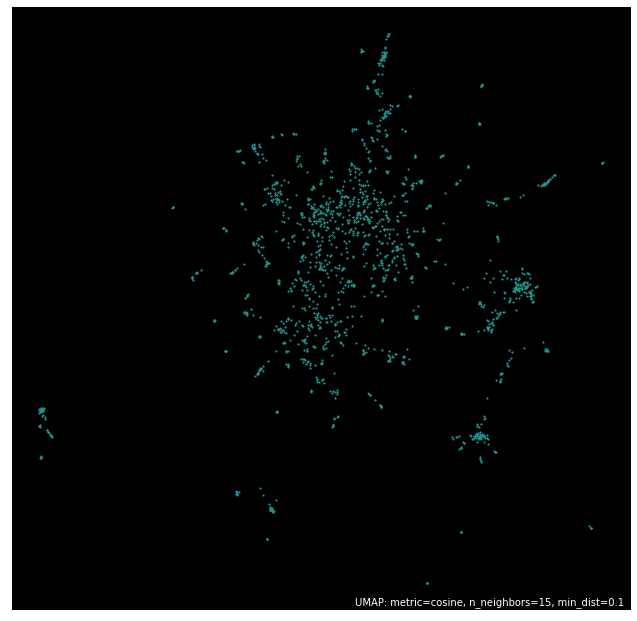

In [ ]:
umap.plot.points(mapper, theme='viridis')

In [ ]:
#import trimap
X2_dense = X2.todense()
y_pca = PCA(n_components = 2).fit_transform(X2_dense)
y_tsne = TSNE().fit_transform(X2_dense)
y_umap = umap.UMAP().fit_transform(X2_dense)
#y_trimap = trimap.TRIMAP(verbose=False).fit_transform(X2_dense)'''
# Convert to dense or X2.toarray() for using parse matrix for PCA, t-SNE, UMAP

## Reducing the number of paramters

In [ ]:
svd = TruncatedSVD(n_components=1000, random_state=0)
small_vector = svd.fit_transform(X2)

small_vector.shape

(1729, 1000)

In [ ]:
pip install hdbscan

     |████████████████████████████████| 4.7MB 2.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2301815 sha256=29c8687c054c0d986b2c71afc15ce8b7142c2785d2bd749643bdb96bdd8faf1e
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


## Trying HDBSCAN

HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=True, leaf_size=40, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=5, min_samples=None, p=None)

In [ ]:
import hdbscan
from collections import Counter

In [ ]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=5,
    cluster_selection_epsilon=0.5,
    min_samples=4
)

In [ ]:
clusterer.fit(small_vector)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.5,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=4, p=None,
        prediction_data=False)

In [ ]:
hdblabel = clusterer.labels_
n_clusters_ = len(set(hdblabel)) - (1 if -1 in hdblabel else 0)
print("Total cluster :",n_clusters_)

Total cluster : 77


In [ ]:
hdb_label = Counter(hdblabel)
hdb_label.most_common(10)

[(-1, 1233),
 (52, 22),
 (59, 20),
 (73, 16),
 (75, 13),
 (61, 11),
 (68, 11),
 (74, 10),
 (76, 10),
 (45, 10)]

In [ ]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

RecursionError: ignored

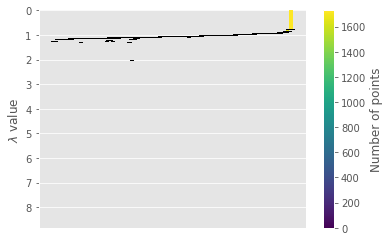

In [ ]:
clusterer.condensed_tree_.plot()

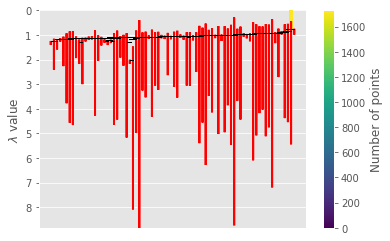

In [ ]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [ ]:
clusterer.outlier_scores_

array([0.0246598 , 0.05466008, 0.        , ..., 0.        , 0.        ,
       0.00042992])

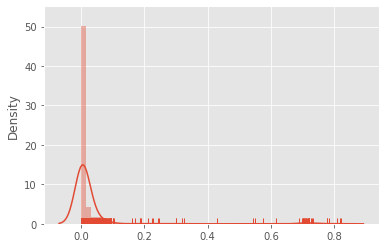

In [ ]:
sns.distplot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)], rug=True)

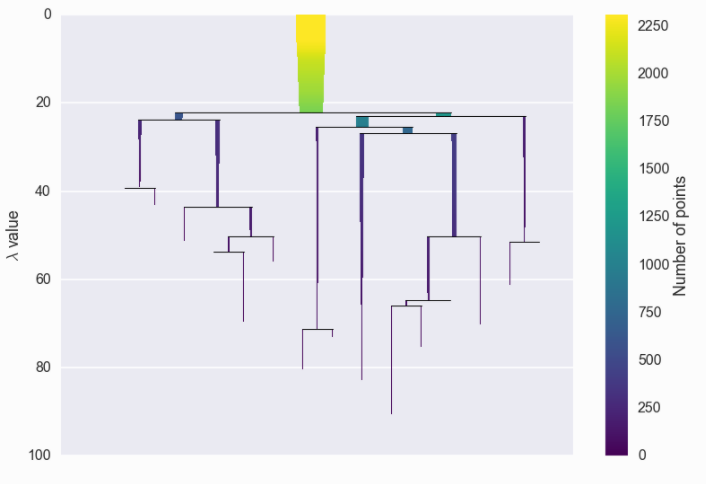

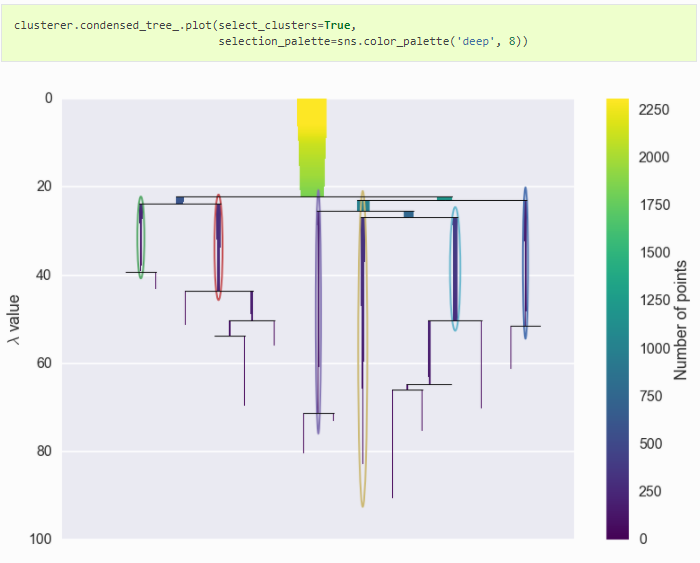

# Trying cosine 

### dist is defined as 1 - the cosine similarity of each document. Cosine similarity is measured against the tf-idf matrix and can be used to generate a measure of similarity between each document and the other documents in the corpus (each doc among the docs). Subtracting it from 1 provides cosine distance which I will use for plotting on a euclidean (2-dimensional) plane.

Note that with dist it is possible to evaluate the similarity of any two or more docs.

In [ ]:
X2.shape

(1729, 122661)

In [ ]:

from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X2)
dist.shape

(1729, 1729)

## K-means clustering (cosine similarity)

In [ ]:

from sklearn.cluster import KMeans

num_clusters = 30

km = KMeans(n_clusters=num_clusters)

%time km.fit(dist)

clusters = km.labels_.tolist()

CPU times: user 6.04 s, sys: 1.71 s, total: 7.75 s
Wall time: 4.63 s


In [ ]:
max_k=30
data=dist
iters = range(4, max_k+1, 2)

sse = []
for k in iters:
    sse_val = MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_
    sse.append(sse_val)
    print('Fit {} clusters, sse {}'.format(k,sse_val))

Fit 4 clusters, sse 6831.807905917389
Fit 6 clusters, sse 6013.461687439669
Fit 8 clusters, sse 5541.9820054326065
Fit 10 clusters, sse 4878.5567659385815
Fit 12 clusters, sse 4627.081349258453
Fit 14 clusters, sse 4420.402496728106
Fit 16 clusters, sse 4306.764138791665
Fit 18 clusters, sse 4089.630646696569
Fit 20 clusters, sse 4025.0671848082784
Fit 22 clusters, sse 3952.023365560529
Fit 24 clusters, sse 3850.242044073945
Fit 26 clusters, sse 3881.080101887671
Fit 28 clusters, sse 3790.0434844127153
Fit 30 clusters, sse 3749.2383718032415


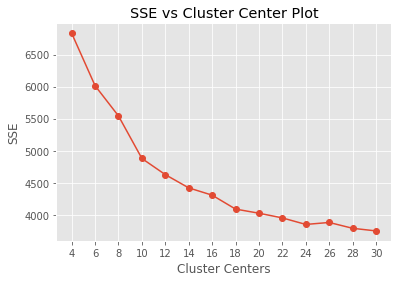

In [ ]:
plt.style.use("ggplot")
f, ax = plt.subplots(1, 1)
ax.plot(iters, sse, marker='o')
ax.set_xlabel('Cluster Centers')
ax.set_xticks(iters)
ax.set_xticklabels(iters)
ax.set_ylabel('SSE')
ax.set_title('SSE vs Cluster Center Plot')
plt.savefig('/content/Clustering-SSE.png')
plt.show()

# Visualize the results

In [ ]:
pca_100=PCA(n_components=100)
pca_100_result=pca_100.fit_transform(dist)
print('Explained variance of 100 principal component analysis is {}'.format(np.sum(pca_100.explained_variance_ratio_)))

Explained variance of 100 principal component analysis is 0.9203271787843441


In [ ]:
#Performing t-SNE on all dimensions
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(pca_100_result)

In [ ]:
df["x_component"]=X_embedded[:,0]
df["y_component"]=X_embedded[:,1] 

In [ ]:
import plotly.express as px
    
fig = px.scatter(df, x="x_component", y="y_component", color = "dbscan_label", size_max=60)
fig.update_layout(height=700)
fig.show()


## HDBSCAN on Cosine Similarity

In [ ]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=10,
    cluster_selection_epsilon=3,
    #cluster_selection_method='leaf',
    min_samples=5
)

In [ ]:
clusterer.fit(dist)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=3,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=10, min_samples=5, p=None,
        prediction_data=False)

In [ ]:
clusterer.labels_

array([ 0,  0,  0, ...,  0, -1,  0])

In [ ]:
clusterer.labels_.max()

1

In [ ]:
clusterer.probabilities_

array([1., 1., 1., ..., 1., 0., 1.])

In [ ]:
hdblabel = clusterer.labels_
n_clusters_ = len(set(hdblabel)) - (1 if -1 in hdblabel else 0)
print("Total cluster :",n_clusters_)

Total cluster : 2


In [ ]:
hdb_label = Counter(hdblabel)
hdb_label.most_common(10)


[(2, 1140), (-1, 487), (0, 49), (1, 43), (3, 10)]

In [ ]:
df['dbscan_label'] = clusterer.labels_
df.head(2)

filename  \
0  008482cf51383c158b54e593cfa5fbf7.pdf   
1  009fab39d746267b6de8428366fe4b02.pdf   

                                                keys  \
0  address__post_town address__postcode address__...   
1  address__post_town address__postcode address__...   

                                           text_djvu  \
0  TAR\n1\nAugust 2016\nTrustees' Annual Report f...   
1  \fAnnual Report 2015-2017 July, 2017\nStepping...   

                                      text_tesseract  \
0  CHARITY Trustees’' Annual Report for the perio...   
1  \n; Na {if anv)\n{\noA el\nC 3 QIC [1€d C\nf (...   

                                       text_textract  \
0  [charity, trustees, annual, report, period, co...   
1  [charity, lif, anv, stepping, stone, theatre, ...   

                                           text_best  \
0  [tar, trustees, annual, report, period, period...   
1  [anv, oa, el, qic, receipts, payments, account...   

                                          lemmatize1  \
0  [charity, trustee, annual, report, period, com...   
1  [charity, lif, anv, stepping, stone, theatre, ...   

                                          lemmatize2  \
0  [tar, trustee, annual, report, period, period,...   
1  [anv, oa, el, qic, receipt, payment, account, ...   

                                            stemmer1  \
0  chariti truste annual report period commiss pe...   
1  chariti lif anv step stone theatr receipt paym...   

                                            stemmer2  \
0  tar truste annual report period period start d...   
1  anv oa el qic receipt payment account period s...   

                                                lmt1  \
0  charity trustee annual report period commissio...   
1  charity lif anv stepping stone theatre receipt...   

                                                lmt2  dbscan_label  \
0  tar trustee annual report period period start ...             2   
1  anv oa el qic receipt payment account period s...             2   

   x_component  y_component  
0   -46.022339    25.111454  
1   -41.956039   -24.139198

In [ ]:
# dist['dbscan_label'] = clusterer.labels_

# Visualizing the clusters formed

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(dist)
df["x_component"]=X_embedded[:,0]
df["y_component"]=X_embedded[:,1] 

In [ ]:
import plotly.express as px
    
fig = px.scatter(df, x="x_component", y="y_component", color = "dbscan_label", size_max=60)
fig.update_layout(height=800)
fig.show()

## Apply clustering on the cluster number 7 formed with 1435 datapoints

In [ ]:
# creating a df_7 with only cluster 7 data
df_7 = df.loc[df['dbscan_label'] == 7]

In [ ]:
df_7.shape

(1435, 13)

In [ ]:
tfidf.fit(df_7['lmt2'].dropna())
text2_7 = tfidf.transform(df_7['lmt2'].dropna()) # text2 for best

In [ ]:
text2_7.shape

(1435, 1708)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english')) 

X2_7 = vectorizer.fit_transform(df_7['lmt2'])

In [ ]:
X2_7.shape

(1435, 106229)

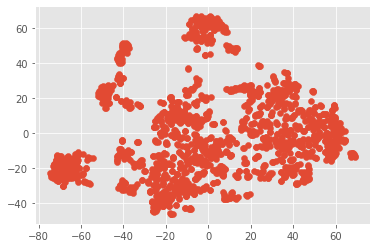

In [ ]:
projection = TSNE().fit_transform(dist) # With tf-idf and Cosine
plt.scatter(*projection.T)

Clearly visible from the plots that tf-idf with cosine similary will works better for clustering.

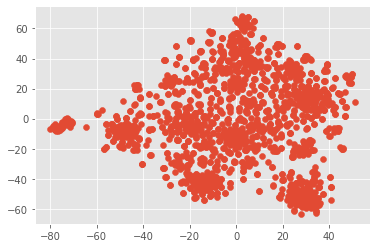

In [ ]:
projection2 = TSNE().fit_transform(X2) # With tf-idf
plt.scatter(*projection2.T)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


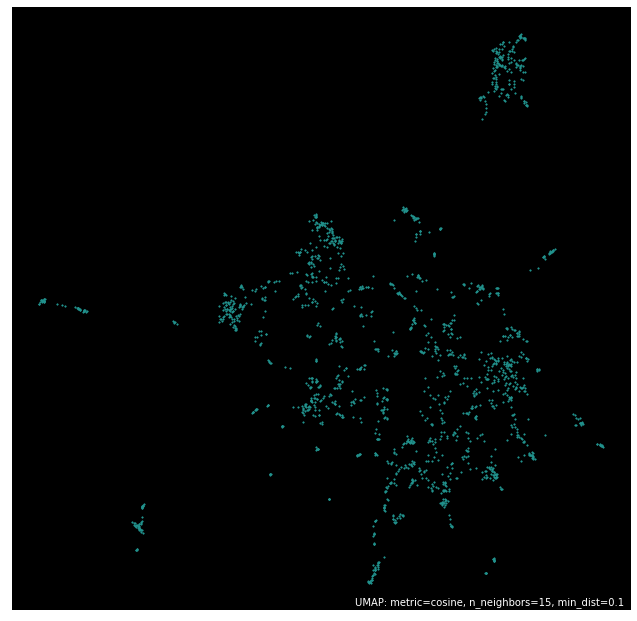

In [ ]:
mapper = umap.UMAP(metric='cosine', random_state=42, low_memory=True).fit(X2)  # With tf-idf
umap.plot.points(mapper, theme='viridis')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


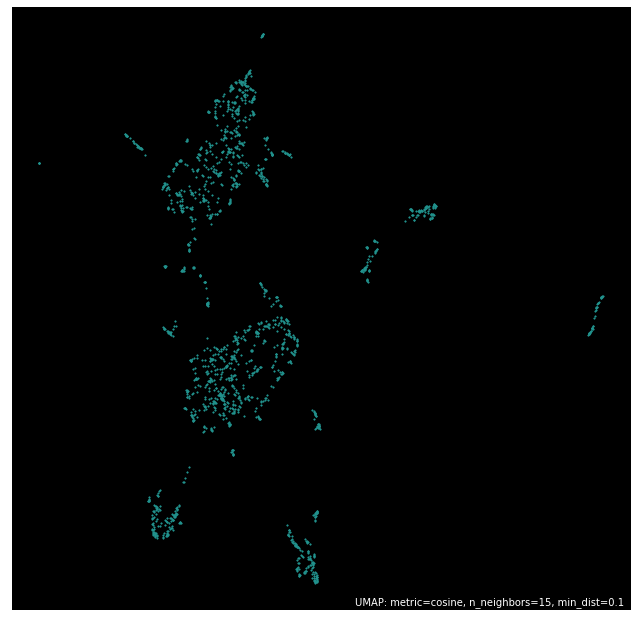

In [ ]:
mapper = umap.UMAP(metric='cosine', random_state=42, low_memory=True).fit(dist)  # With tf-idf and Cosine
umap.plot.points(mapper, theme='viridis')


In [ ]:
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(df)

# plot t-SNE clusters
>>> from bioinfokit.visuz import cluster
>>> cluster.tsneplot(score=tsne_em)
# plot will be saved in same directory (tsne_2d.png) 

https://reneshbedre.github.io/blog/tsne.html